In [1]:
from texto.texto import Texto
from texto.texto import fatora_svd, plota_erro_svd, refaz_camadas_svd, plota_barras, plota_wordcloud, csv_para_lista
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import norm as np_norm
from scipy.sparse.linalg import norm as sp_norm
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame, Series
from wordcloud import WordCloud
import pandas as pd
from time import time

### 1. Dom Casmurro

In [6]:
txt = Texto('data/dom_casmurro.txt', stop_words=None)
txt.ocorrencias  # matriz documento-termo
bases, coordenadas = fatora_svd(txt.ocorrencias, 2)
print(f"Bases: {bases.shape}")
print(f"Coordenadas: {coordenadas.shape}")

Bases: (49, 2)
Coordenadas: (2, 387)


In [7]:
matriz_reconstruida = bases @ coordenadas
print(f"Norma original: {sp_norm(txt.ocorrencias)}")
print(f"Norma apos compressao: {np_norm(matriz_reconstruida)}")

Norma original: 28.053520278211074
Norma apos compressao: 13.900771605101562


#### Comparando o erro de cada número de componentes

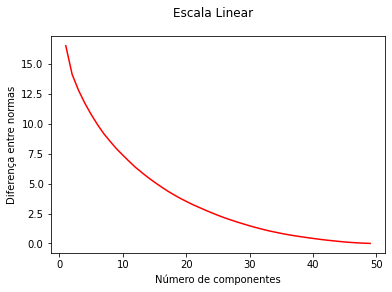

In [8]:
plota_erro_svd(txt.ocorrencias)

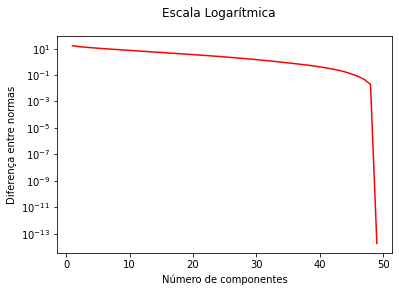

In [9]:
plota_erro_svd(txt.ocorrencias, log=True)

### 2. Inglês X Português

In [10]:
txt2 = Texto('data/assis_vs_wells.txt')
bases, coordenadas = fatora_svd(txt2.ocorrencias, 2)
print(f"Bases: {bases.shape}")
print(f"Coordenadas: {coordenadas.shape}")

Bases: (98, 2)
Coordenadas: (2, 682)


#### Mostrar as palavras de cada grupo

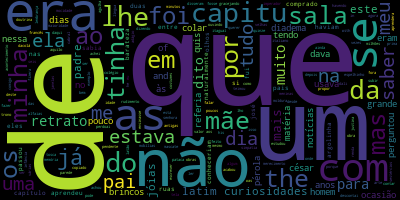

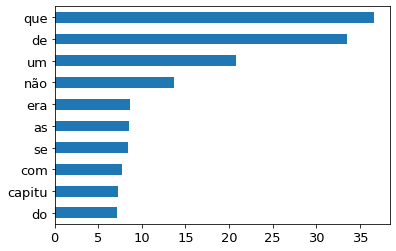

In [11]:
camadas = refaz_camadas_svd(bases, coordenadas)
plota_barras(camadas[0], txt2.palavras_distintas)
plota_wordcloud(camadas[0], txt2.palavras_distintas)

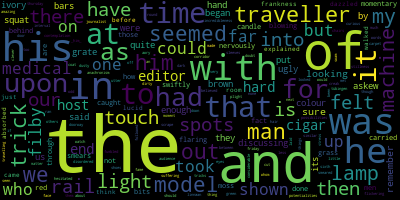

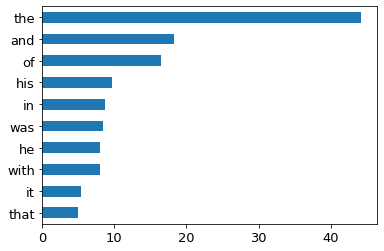

In [12]:
plota_barras(camadas[1], txt2.palavras_distintas)
plota_wordcloud(camadas[1], txt2.palavras_distintas)

### 2. TripAdvisor

In [2]:
reviews = csv_para_lista('data/reviews.csv', 'Review')
rtxt = Texto(reviews, arquivo=False, stop_words='english')
rbases, rcoordenadas = fatora_svd(rtxt.ocorrencias, 2)
print(f"Bases: {rbases.shape}")
print(f"Coordenadas: {rcoordenadas.shape}")

Bases: (20491, 2)
Coordenadas: (2, 52650)


#### Mostrar as palavras de cada grupo

<AxesSubplot:>

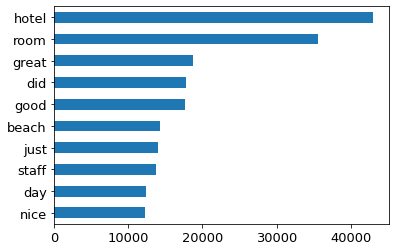

In [4]:
camadas = refaz_camadas_svd(rbases, rcoordenadas)
plota_barras(camadas[0], rtxt.palavras_distintas)

<AxesSubplot:>

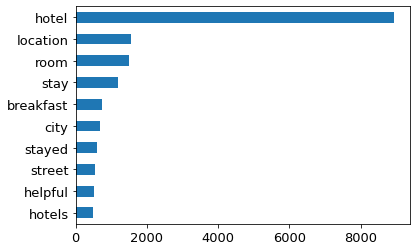

In [5]:
plota_barras(camadas[1], rtxt.palavras_distintas)